# Excess entropy 


importing ...

In [3]:
import h5py
import mne
import numpy as np
import scipy.stats as stats
import scipy
import pandas as pd
from os.path import join as pjoin
from itertools import product
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import colors
import matplotlib.cm as cm
import random
import os
import pickle
import warnings 
import matplotlib
import seaborn as sns
import saving as sv
import mattepy as mp
import utils_avalanches as av
import Utils_FC as fc
from scipy.stats import entropy

warnings.simplefilter('ignore')

#path='/home/jeremy/anaconda3/matteo/'
path='C:/Users/matte/OneDrive/Documenti/matteo/'
#CREATING THE LIST OF SUBJECTS

In [4]:
def excess_entropy1(data, n, overlap=True, biascorrect=True):
    
    #print(np.unique(data))
    n_regions=len(data)
    exen=np.zeros(n_regions)
    n_comb=2**n
    molt=np.zeros(n_comb)
    molt[0]=0
    molt[1]=1
    
    for i in np.arange(2,n_comb):
        molt[i]=molt[i-1]*2+1
    
    n_overlap=1
    
    if overlap:
        n_overlap=n
    
    else:
        n_overlap=1
        
    for m in range(n_overlap):
        
        dvb=data[:,m:int(len(data[0,m:])/n)*n+m].copy()
        #print(dvb[:,0:5])
        dvbb=np.reshape(dvb, (n_regions, int(len(dvb[0,:])/n),n))
        
        
        for i in range(n):
            dvbb[:,:,i]=(2**i)*dvbb[:,:,i]
        
        bbnd=np.sum(dvbb, axis=2)
        
        for i in np.arange(n_comb-1,1,-1):
            bbnd=np.where(bbnd==i, molt[i], bbnd)
            
        bbnd_diff=np.diff(bbnd, axis=1)
        
            
        if m==0:
            bnd=bbnd
            bnd_diff=bbnd_diff
        elif m!=0:
            bnd=np.concatenate((bnd, bbnd), axis=1)
            bnd_diff=np.concatenate((bnd_diff, bbnd_diff), axis=1)

        
        
    for k in range(n_regions):
        
        
        trans0=np.zeros((n_comb, n_comb))
        pp=np.zeros(n_comb)
        
        bn=bnd[k,:]
        
        
            
        
        #print(bn)
        bn_diff =bnd_diff[k,:]
            
        summy=np.zeros(n_comb)
        for i in range(n_comb):
                
            nn=len(np.where(bn==molt[i])[0])
            if nn!=0:
                
                #ccc=nn/len(bn)
                
                pp[i]=nn/len(bn)
                #print(nn)
                    
                for j in range(n_comb):
                    if i!=j:
                        
                        #aaa=len(np.where(bn_diff==molt[j]-molt[i])[0])/nn
                        trans0[j,i]=len(np.where(bn_diff==molt[j]-molt[i])[0])/nn
                        
                        if trans0[j,i]<0:
                            print(len(np.where(bn_diff==molt[j]-molt[i])[0]))
                            print(molt[j]-molt[i])
                            
                summy[i]=np.sum(trans0[:,i])
                #print(summy[i])
                        
        for i in range(n_comb):
            trans0[i,i]=1.0-summy[i]                  
            if trans0[i,i]<0.000000000000001:
                trans0[i,i]=0
                
        
        count=0
        
        for i in range(n_comb):
            for j in range(n_comb):
                count+=trans0[i,j]*pp[j]
                
        if count>1:
            print("Error!!!")
            print(count, k)
         
        count=0
        for i in range(n_comb):
            for j in range(n_comb):
                if trans0[i,j]!=0 and pp[i]!=0 and pp[j]!=0 :
                    count+=trans0[i,j]*pp[j]*np.log(trans0[i,j]/pp[i])
                    #if math.isnan(trans0[i,j]*pp[j]*np.log(trans0[i,j]/pp[i]))==True:
                        #print(trans0[i,j],pp[i])
                        #print(trans0[i,j]<0)
                        #print(i,j)
        #print(count)
        if biascorrect:
            count+= (n_comb -1)/len(bnd[0,:])
            
        exen[k]=count
    excess_entropy=exen/np.log(2**n)
    
    return excess_entropy




def excess_entropy22(data, n, overlap=True, biascorrect=True):
    
    #print(np.unique(data))
    n_regions=len(data)
    exen=np.zeros(n_regions)
    n_comb=2**n
    molt=np.zeros(n_comb)
    molt[0]=0
    molt[1]=1

    for i in np.arange(2,n_comb):
        molt[i]=molt[i-1]*2+1
    
    #print(data.shape)
    data_newax=data[:,:,np.newaxis]
    dvb=data_newax[:,:-n,:]

    for i in np.arange(1,n,1):

        dvb=np.concatenate((dvb, data_newax[:, i:-(n-i), :]), axis=2)


        
    #print(dvb.shape) 
    for i in range(n):
        dvb[:,:,i]=(2**i)*dvb[:,:,i]
        
        bnd=np.sum(dvb, axis=2)
        
        for i in np.arange(n_comb-1,1,-1):
            bnd=np.where(bnd==i, molt[i], bnd)
            
        bnd_diff=np.diff(bnd, axis=1)

        
    for k in range(n_regions):
        
        
        trans0=np.zeros((n_comb, n_comb))
        pp=np.zeros(n_comb)
        
        bn=bnd[k,:]
        
        
            
        
        #print(bn)
        bn_diff = bnd_diff[k,:]
            
        summy=np.zeros(n_comb)
        for i in range(n_comb):
                
            nn=len(np.where(bn==molt[i])[0])

            if bn[-1]==molt[i]:
                nn-=1

            if nn!=0:
                
                #ccc=nn/len(bn)
                
                pp[i]=nn/len(bn)
                #print(nn)
                    
                for j in range(n_comb):
                    if i!=j:
                        
                        #aaa=len(np.where(bn_diff==molt[j]-molt[i])[0])/nn
                        trans0[j,i]=len(np.where(bn_diff==molt[j]-molt[i])[0])/nn
                        
                    
                        if trans0[j,i]<0:
                            print(len(np.where(bn_diff==molt[j]-molt[i])[0]))
                            print(molt[j]-molt[i])
                    
                    elif i==j:
                        trans0[i,i]=len(set(np.where(bn_diff==0)[0]).intersection(set(np.where(bn==molt[i])[0])))/nn
                            
                #summy[i]=np.sum(trans0[:,i])
                #print(summy[i])
                        
        """for i in range(n_comb):
            trans0[i,i]=1.0-summy[i]                  
            if trans0[i,i]<0.000000000000001:
                trans0[i,i]=0"""
                
        
        count=0
        
        for i in range(n_comb):
            for j in range(n_comb):
                count+=trans0[i,j]*pp[j]
                
        if count>1:
            print("Error!!!")
            print(count, k)
         
        count=0
        for i in range(n_comb):
            for j in range(n_comb):
                if trans0[i,j]!=0 and pp[i]!=0 and pp[j]!=0 :
                    count+=trans0[i,j]*pp[j]*np.log(trans0[i,j]/pp[i])
                    #if math.isnan(trans0[i,j]*pp[j]*np.log(trans0[i,j]/pp[i]))==True:
                        #print(trans0[i,j],pp[i])
                        #print(trans0[i,j]<0)
                        #print(i,j)
        #print(count)
        
        if biascorrect:

            count+= (n_comb -1)/len(bnd[0,:])
            
        exen[k]=count

    excess_entropy=exen/np.log(2**n)
    
    return excess_entropy




def excess_entropy_multistates(data, n, biascorrect=True):

    n_regions=len(data)
    exen=np.zeros(n_regions)
    n_comb=2**n
    molt=np.zeros(n_comb)
    molt[0]=0
    molt[1]=1

    for i in np.arange(2,n_comb):
        molt[i]=molt[i-1]*2+1
    
    #print(data.shape)
    data_newax=data[:,:,np.newaxis]
    dvb=data_newax[:,:-n-1,:]

    for i in np.arange(1,n,1):
        print(dvb.shape, data_newax[:, i:-n-i+1, :].shape)
        dvb=np.concatenate((dvb, data_newax[:, i:-n-i+1, :]), axis=2)


        
    #print(dvb.shape) 
    for i in range(n):
        dvb[:,:,i]=(2**i)*dvb[:,:,i]
        
        bnd=np.sum(dvb, axis=2)
        
        for i in np.arange(n_comb-1,1,-1):
            bnd=np.where(bnd==i, molt[i], bnd)
    
    return excess_entropy_voila(bnd, biascorrect=biascorrect)


def excess_entropy_multistates(data, n, biascorrect=True):

    n_regions=len(data)
    exen=np.zeros(n_regions)
    n_comb=2**n
    molt=np.zeros(n_comb)
    molt[0]=0
    molt[1]=1

    for i in np.arange(2,n_comb):
        molt[i]=molt[i-1]*2+1
    
    #print(data.shape)
    data_newax=data[:,:,np.newaxis]

    for i in np.arange(1,n,1):
        print(dvb.shape, data_newax[:, i:-n-i+1, :].shape)
        dvb=np.concatenate((dvb, data_newax[:, i:-n-i+1, :]), axis=2)


        
    #print(dvb.shape) 
    for i in range(n):
        dvb[:,:,i]=(2**i)*dvb[:,:,i]
        
        bnd=np.sum(dvb, axis=2)
        
        for i in np.arange(n_comb-1,1,-1):
            bnd=np.where(bnd==i, molt[i], bnd)
    
    return excess_entropy_voila(bnd, biascorrect=biascorrect)

def excess_entropy_multistates_no_slide(data, n, biascorrect=True):

    nregions=len(data)
    n_time=len(data[0,:])
    new_n_time=int(n_time/n)*n
    n_comb=2**n
    molt=np.zeros(n_comb)
    molt[0]=0
    molt[1]=1

    for i in np.arange(2,n_comb):
        molt[i]=molt[i-1]*2+1
    
    #print(data.shape)
    data_newax=data[:, :new_n_time ,np.newaxis]
    dvb=np.reshape(data[:, :new_n_time], (nregions, int(new_n_time/n), n))

    #print(dvb.shape) 
    for i in range(n):
        dvb[:,:,i]=(2**i)*dvb[:,:,i]
        
        bnd=np.sum(dvb, axis=2)
        
        for i in np.arange(n_comb-1,1,-1):
            bnd=np.where(bnd==i, molt[i], bnd)
    
    return excess_entropy_voila(bnd, biascorrect=biascorrect)


            
    

def excess_entropy_voila(data,biascorrect=True):
    
    #data must be given in a regions x time matrix
    nregions=len(data)
    times=len(data[0,:])
    exx=np.zeros(nregions)
    for k in range(nregions):
        
        joint_data=np.concatenate((data[np.newaxis, k,:-1], data[np.newaxis, k,1:]), axis=0)
        #print(joint_data.shape)
        H_XY=entropy(np.unique(joint_data, return_counts=True, axis=1)[1])
        H_X=entropy(np.unique(data[k,:-1], return_counts=True)[1])
        H_Y=entropy(np.unique(data[k,1:], return_counts=True)[1])
        
        exx[k]=(H_X+H_Y-H_XY)
    
    return exx
        



In [7]:
a=np.random.rand(4,1000)
a=np.where(a>0.5,1,0)

excess_entropy_voila(a,1)

array([1.71109713e-04, 1.50117451e-06, 6.07901071e-05, 4.84385919e-04])

In [8]:
import numpy as np
for i in np.arange(1,3,1):
    print(i)

a=np.array([[3,5,34],[3,3,3],[1,2,3]])
np.where((a==5).any() or (a==3).any())[0]
a[-1]

1
2


array([1, 2, 3])

Uploading the subject and channels list

In [5]:

sound_list=['rest','music','speech']
arr_mu = os.listdir(path +'seeg_fif_data/music')
arr_rest = os.listdir(path +'seeg_fif_data/speech')
arr_speech = os.listdir(path +'seeg_fif_data/rest')

subject_set_mu=set()
subject_set_speech=set()
subject_set_rest=set()

for st in arr_mu: 
    #print(st)
    subject_set_mu.add(st.partition('_')[0])
    #print(st.partition('_')[0])
    
for st in arr_speech:
    subject_set_speech.add(st.partition('_')[0])
    
for st in arr_rest:
    subject_set_rest.add(st.partition('_')[0])

subject_list=list(subject_set_mu.intersection(subject_set_speech,subject_set_rest))

#Here I create a set of the  all channels
total_channels_set=set()

for subject in subject_list:
    with h5py.File(pjoin(path +'seeg_data_h5py/h5_electrodes/', subject + '_electrodes.hdf5'), 'r') as f:
        #print(f.keys())
        #print('chnames', f['chnames'].shape)
        
        chnames = f['chnames'][...].astype('U')
        total_channels_set.update(chnames)
        
#print(total_channels_set)


#Here I create a set of the H channels
ch_H=set()
for ch in total_channels_set:
    
    if "H" in ch:
        ch_H.add(ch)

#Here I create another set of channels        
ch_IM=set()
for ch in total_channels_set:
    
    if "IP" in ch:
        ch_IM.add(ch)
#print(ch_H)

def excess_entropy_voil_a(data, bina, overlap=True, biascorrect=True):
    
    #print(np.unique(data))
    
    
    nregions=len(data)
    times=len(data[0,:])
    re_len=int(times/bina)*bina  
    redat=np.reshape(data[ :, :re_len], [bina, nregions, int(re_len/bina)])
    exx=[]
    
    for k in range(nregions):
        
        joint_data=np.concatenate((redat[:,k,:-1],redat[:,k,1:]), axis=0)
        total=len(np.unique(joint_data, return_counts=True, axis=0)[0])
        #print(len(np.unique(joint_data, return_counts=True, axis=0)[1]))
        H_XY=entropy(np.unique(joint_data, return_counts=True, axis=0)[1], base=total)
        H_X=entropy(np.unique(data[k,:-bina], return_counts=True)[1], base=2)
        H_Y=entropy(np.unique(data[k,bina:], return_counts=True)[1], base=2)
        
        exx.append(H_X+H_Y-H_XY)
    
    return np.array(exx)



Here the work on the data, the data sets of each subject are uploaded and the entropy of each regions of each subjects during each condition is computed.

In [6]:

                
#PARAMETERS

subject_list=subject_list
min_sizes=np.arange(1,20,2)

size_rest=[]
size_speech=[]
size_music=[]

mean_vector_speech=[]
mean_vector_music=[]
mean_vector_rest=[]

subject_iai_speech=[]
subject_iai_music=[]
subject_iai_rest=[]

fc_dict={}

final_channels_without_H={}

final_channels_H={}

final_channels_all={}

rss_speech=[]
rss_music=[]
rss_rest=[]

sig=50 #parameter to smooth the ap signal

complexity_list_speech=[]
complexity_list_music=[]
complexity_list_rest=[]

binsizes=np.concatenate((np.array([50]),np.arange(80,99,3)))

binsizes=np.arange(30,80,5)

ex_entropy={}

entropyy={}
for b, bins in enumerate(binsizes):
    print('Done for threshold at this percentile ', bins)
    ex_entropy[bins]={}
    for isub, subject in enumerate(subject_list):
        entropyy[subject]={}
        zdata={}
        
        fc_dict[subject]={}
        
        #MUSIC
        with h5py.File(pjoin(path+'seeg_data_hgenv_down100_h5py/', subject + '_down100_seeg_preproc.hdf5'), 'r') as f:
    
            #data_music[subject]=f['music'][...]
            data_m=f['music'][...]
            data_s=f['speech'][...]
            data_r=f['rest'][...]
            
        index_del=np.concatenate((np.arange(int(len(data_r[0,:])/3)-200,int(len(data_r[0,:])/3)+200),np.arange(int(len(data_r[0,:])*2/3)-200,int(len(data_r[0,:])*2/3)+200)))   
        data_r=np.delete(data_r, index_del, axis=1)
        data_s=np.delete(data_s, index_del, axis=1)
        data_m=np.delete(data_m, index_del, axis=1)
    
        
        data_s=data_s[:,100:40000]
        data_m=data_m[:,100:40000]
        data_r=data_r[:,100:40000]
    
    
    # redefine path
    # below example of loading of music data.
    
        with h5py.File(pjoin(path+ 'seeg_data_h5py/h5_electrodes/', subject + '_electrodes.hdf5'), 'r') as f:
            
        
            chnames = f['chnames'][...].astype('U')
    
        with h5py.File(pjoin(path + 'seeg_data_h5py/h5_misc/', subject + '_misc.hdf5'), 'r') as f:
            
    
            bad_chans = f['outlier_chans']['strict_bads_names'][...].astype('U')
            mu_bad_epo = f['outlier_epochs']['music']['strict_bads_epochs'][...]
            sp_bad_epo = f['outlier_epochs']['speech']['strict_bads_epochs'][...]
    
    ## Cleaning from artifacts
    
        ch_i = [i for i, ch in enumerate(chnames) if ch in bad_chans]
        
        clean_chnames = [ch for i, ch in enumerate(chnames) if ch not in bad_chans]
        
        clean_music = np.delete(data_m, ch_i, axis=0)
        clean_speech = np.delete(data_s, ch_i, axis=0)
        clean_rest = np.delete(data_r, ch_i, axis=0)
    
    #selecting only the channels we want, in this script H
        ch_H_i= [i for i, ch in enumerate(clean_chnames) if ch not in ch_H]
        ch_H_w_i= [i for i, ch in enumerate(clean_chnames) if ch in ch_H]
        
        final_channels_without_H[subject]=[ch for i, ch in enumerate(clean_chnames) if i in ch_H_i]
        final_channels_H[subject]=[ch for i, ch in enumerate(clean_chnames) if i not in ch_H_i]
        final_channels_all[subject]=clean_chnames
        
        clean_music_H = np.delete(clean_music, ch_H_i, axis=0)
        clean_speech_H = np.delete(clean_speech, ch_H_i, axis=0)
        clean_rest_H = np.delete(clean_rest, ch_H_i, axis=0)
        
        clean_music_without_H = np.delete(clean_music, ch_H_w_i, axis=0)
        clean_speech_without_H = np.delete(clean_speech, ch_H_w_i, axis=0)
        clean_rest_without_H = np.delete(clean_rest, ch_H_w_i, axis=0)
        
        #clean_mu=clean2(clean_music_H, N=3)
        #clean_sp=clean2(clean_speech_H, N=3)
        #clean_re=clean2(clean_rest_H, N=3)
        
        zdata_speech_art=stats.zscore(clean_speech_H, axis=1)
        zdata_music_art=stats.zscore(clean_music_H, axis=1)
        zdata_rest_art=stats.zscore(clean_rest_H, axis=1)
        
        zdata_speech=np.where(np.abs(zdata_speech_art)>5, 0, zdata_speech_art)
        zdata_music=np.where(np.abs(zdata_music_art)>5, 0, zdata_music_art)
        zdata_rest=np.where(np.abs(zdata_rest_art)>5, 0, zdata_rest_art)
        
        zdata['speech']=stats.zscore(zdata_speech, axis=1)
        zdata['music']=stats.zscore(zdata_music, axis=1)
        zdata['rest']=stats.zscore(zdata_rest, axis=1)
        ex_entropy[bins][subject]={}
    
        for sound in sound_list:
            entropyy[subject][sound]=[]
            for ll in [5]:
                #zdat=stats.zscore(np.random.rand(len(zdata[sound]), len(zdata[sound][0,:])), axis=1)
                zdat=zdata[sound]    
                thres=np.percentile(zdata['speech'], bins)
                avalanches=av.go_avalanches(zdat.T, thre=thres, direc=1, binsize=1)

                
                data_bin=avalanches['Zbin'].T[:,np.where(np.sum(avalanches['Zbin'].T, axis=0)>0)[0]]
                
                #print(data_bin.shape)
                exce=excess_entropy_multistates_no_slide(data_bin, ll, biascorrect=False)
                
                ex_entropy[bins][subject][sound]=exce
                
                #excess_entropy[bins][subject][sound]=exce
                
        
        print('done subject', subject)
sv.saving(ex_entropy, path+'excess_entropy_changing_threshold')


Done for threshold at this percentile  30
done subject sub-cacae171ee15
done subject sub-3ef8645f99c5
done subject sub-82e330f8aadd
done subject sub-83ebd5328120
done subject sub-ebf231d97f73
done subject sub-9d783b836f5e
done subject sub-4247d6d6cdbf
done subject sub-c1b7ce54ce05
done subject sub-e0bb6ccef2a5
done subject sub-aea837fa1826
done subject sub-fccb4adbfadc
done subject sub-26176ef8a8d0
done subject sub-14c725b6b803
done subject sub-28e70e7c7fbb
done subject sub-44375d501493
done subject sub-95a634be7e05
done subject sub-a4e7fc9daa96
done subject sub-45a6830d263e
done subject sub-c2a96116ddc4
Done for threshold at this percentile  35
done subject sub-cacae171ee15
done subject sub-3ef8645f99c5
done subject sub-82e330f8aadd
done subject sub-83ebd5328120
done subject sub-ebf231d97f73
done subject sub-9d783b836f5e
done subject sub-4247d6d6cdbf
done subject sub-c1b7ce54ce05
done subject sub-e0bb6ccef2a5
done subject sub-aea837fa1826
done subject sub-fccb4adbfadc
done subject sub

In [11]:
13*19950*2

518700

# Excess entropy vs binarization threshold

Here the relationship between the excess entropy of a data set and the threshold used to binarized it is studied. It is shown as if we fixed a threshold at the 85th percentile we can distinguish the data sets using the excess entropy. 

(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)


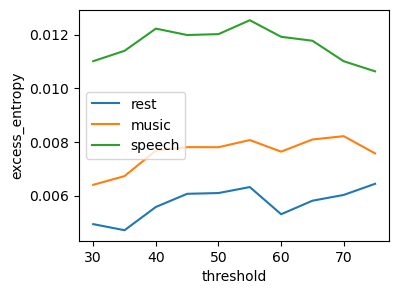

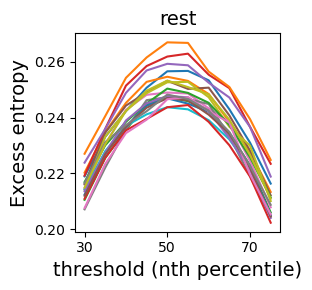

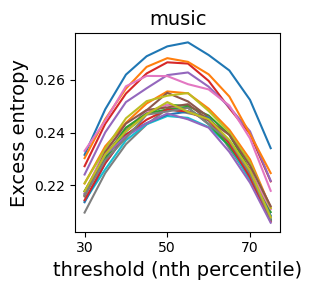

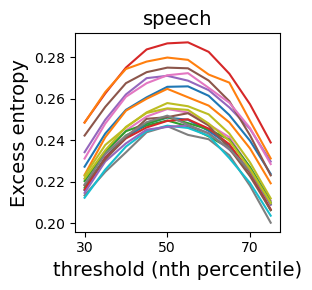

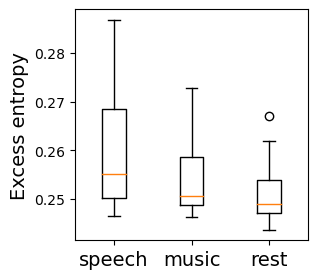

SPEECH vs REST -- pvalue =  0.0


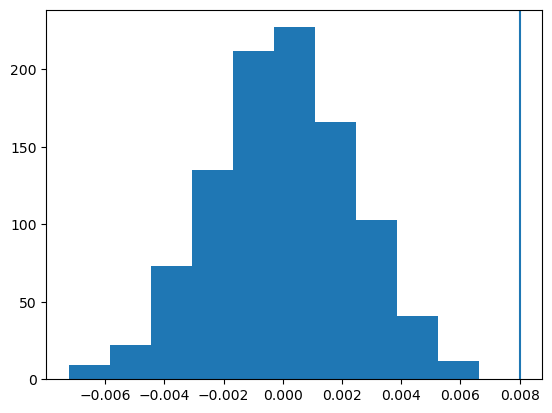

music vs REST -- pvalue =  0.026


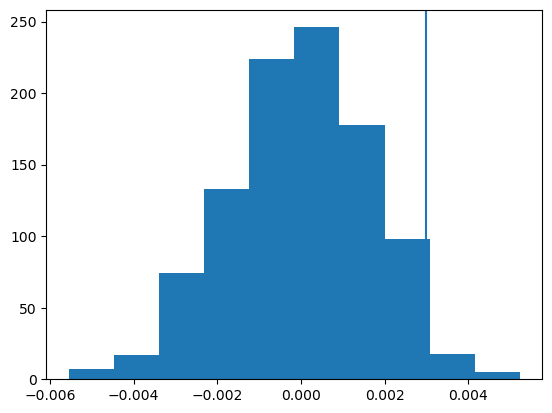

In [12]:
#sv.saving(excess_entropy, path+'excess_entropy_changing_threshold')
excess_entropy=sv.loading(path+'excess_entropy_changing_threshold')
#binsizes=np.concatenate((np.array([50]),np.arange(80,99,3)))

ex_entropy={}
for subject in subject_list:
    ex_entropy[subject]={}
    for sound in sound_list:
        ex_entropy[subject][sound]=[]
    
for subject in subject_list:
    for sound in sound_list:
        for  bins in binsizes:
            ex_entropy[subject][sound].append(np.mean(excess_entropy[bins][subject][sound]))
            
            
ent_accross={}
ent_accross_std={}
ent_accross_mean={}

for sound in sound_list:
    ent_accross[sound]={}
    ent_accross_std[sound]=[]
    ent_accross_mean[sound]=[]
    for bins in binsizes:
        ent_accross[sound][bins]=[]

for sound in sound_list:
    for bins in binsizes:
        for subject in subject_list:
            
            ent_accross[sound][bins].append(np.mean(excess_entropy[bins][subject][sound]))
            
for sound in sound_list:
    for bins in binsizes:
        ent_accross[sound][bins]=np.array(ent_accross[sound][bins])
        ent_accross[sound][bins].shape
        
for sound in sound_list:
    for bins in binsizes:
        ent_accross_std[sound].append(np.mean(ent_accross[sound][bins]))
        ent_accross_mean[sound].append(np.std(ent_accross[sound][bins]))



for sound in sound_list:
    ent_accross_mean[sound]=np.array(ent_accross_mean[sound])
    ent_accross_std[sound]=np.array(ent_accross_std[sound])
    print(ent_accross_mean[sound].shape)
    print(ent_accross_std[sound].shape)
    print(binsizes.shape)

plt.figure(figsize=(4,3))
for sound in sound_list:
    plt.plot(binsizes, ent_accross_mean[sound], label=sound)
plt.xlabel('threshold', fontsize=10)
plt.ylabel('excess_entropy', fontsize=10)
plt.legend(fontsize=10)
plt.show()
plt.close()
            
ent_across_speech=np.array(ent_accross['speech'][50])
ent_across_rest=np.array(ent_accross['rest'][50])
real_differ_speech=np.mean(ent_across_speech)-np.mean(ent_across_rest)
ent_random_=np.concatenate((ent_across_speech, ent_across_rest))
list_random_corr_speech=[]
count_speech=0
n_it=1000
for i in range(n_it):
    indices=random.sample(range(38), 19)
    ent_random1=ent_random_[indices]
    indices=random.sample(range(38), 19)
    ent_random2=ent_random_[indices]
    differ=np.mean(ent_random1)-np.mean(ent_random2)
    list_random_corr_speech.append(differ)
    if differ>real_differ_speech:
        count_speech+=1      



ent_across_music=np.array(ent_accross['music'][50])
ent_across_rest=np.array(ent_accross['rest'][50])
real_differ_music=np.mean(ent_across_music)-np.mean(ent_across_rest)
list_random_corr_music=[]
count_music=0
n_it=1000
ent_random_=np.concatenate((ent_across_music, ent_across_rest))
for i in range(n_it):
    indices=random.sample(range(38), 19)
    ent_random1=ent_random_[indices]
    indices=random.sample(range(38), 19)
    ent_random2=ent_random_[indices]
    differ=np.mean(ent_random1)-np.mean(ent_random2)
    list_random_corr_music.append(differ)
    if differ>real_differ_music:
        count_music+=1     
            
fs=14
for sound in sound_list:
    plt.figure(figsize=(3,3))
    plt.title(sound, fontsize=fs)
    for subject in subject_list:
        plt.plot(binsizes, ex_entropy[subject][sound])
    plt.ylabel('Excess entropy', fontsize=fs)
    plt.xticks(binsizes[::4], binsizes[::4])
    plt.xlabel('threshold (nth percentile)', fontsize=fs)
    plt.tight_layout()
    plt.savefig(path+'figure/Excess_entropy_vs_threshold_'+sound+'.png', dpi=600)
    plt.show()
    plt.close()
    


#print(stats.wilcoxon(ent_accross['speech'], ent_accross['rest']))
plt.figure(figsize=(3,3))
plt.boxplot([ent_accross['speech'][50], ent_accross['music'][50], ent_accross['rest'][50]])
plt.ylabel('Excess entropy', fontsize=fs)
plt.xticks([1,2,3], ['speech', 'music', 'rest'], fontsize=fs)
plt.savefig(path+'figure/Excess entropy_boxplots_sound_vs_sound.png', dpi=600)
plt.show()
plt.close()

pvalue_speech=count_speech/n_it
pvalue_music=count_music/n_it

print('SPEECH vs REST -- pvalue = ', pvalue_speech)

plt.hist(list_random_corr_speech)
plt.axvline(real_differ_speech)
plt.show()
plt.close()

print('music vs REST -- pvalue = ', pvalue_music)
plt.hist(list_random_corr_music)
plt.axvline(real_differ_music)
plt.show()
plt.close()


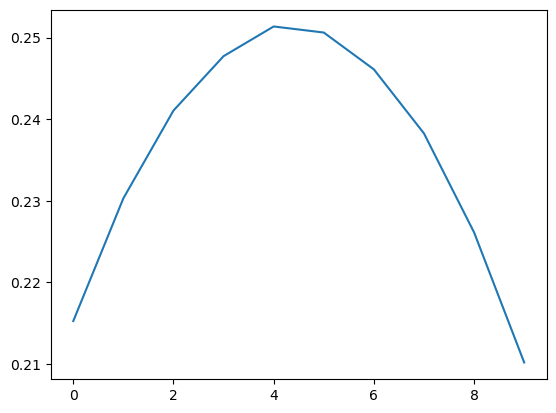

In [13]:
aa=[]
for bins in binsizes:
    aa.append(np.mean(ent_accross['rest'][bins]))

plt.plot(aa)

In [14]:
#excess_entropy=sv.loading(path+'excess_entropy_changing_threshold')


ex_entropy={}
for subject in subject_list:
    ex_entropy[subject]={}
    for sound in sound_list:
        ex_entropy[subject][sound]=[]
    
for  bins in binsizes:
    for subject in subject_list:
        for sound in sound_list:
            ex_entropy[subject][sound].append(np.mean(excess_entropy[bins][subject][sound]))
            
ent_accross={}
for sound in sound_list:
    ent_accross[sound]=[]

for subject in subject_list:
    for sound in sound_list:
        ent_accross[sound].append(max(ex_entropy[subject][sound]))


ent_across_speech=np.array(ent_accross['speech'])
ent_across_music=np.array(ent_accross['rest'])
real_differ=np.mean(ent_across_speech)-np.mean(ent_across_music)

ent_random_=np.concatenate((ent_across_speech, ent_across_music))


list_random_corr=[]
count=0
n_it=10000
for i in range(n_it):
    indices=random.sample(range(38), 19)
    ent_random1=ent_random_[indices]
    indices=random.sample(range(38), 19)
    ent_random2=ent_random_[indices]
    differ=np.mean(ent_random1)-np.mean(ent_random2)
    list_random_corr.append(differ)
    if differ>real_differ:
        count+=1

    
fs=14
plt.
for subject in subject_list:
    plt.figure(figsize=(3,3))

    for sound in sound_list:
        plt.plot(binsizes, ex_entropy[subject][sound], label=sound)
    plt.ylabel('information', fontsize=fs)
    plt.xticks(binsizes[::4], binsizes[::4])
    plt.xlabel('threshold (nth percentile)', fontsize=fs)
    plt.legend(fontsize=fs)
    plt.tight_layout()
    plt.savefig(path+'figure/Excess entropy_vs_threshold_'+subject+'.png', dpi=600)
    plt.show()
    plt.close()



#print(stats.wilcoxon(ent_accross['speech'], ent_accross['rest']))
plt.figure(figsize=(3,3))
plt.boxplot([ent_accross['speech'], ent_accross['music'], ent_accross['rest']])
plt.ylabel('Excess entropy', fontsize=fs)
plt.xticks([1,2,3], ['speech', 'music', 'rest'], fontsize=fs)
plt.savefig(path+'figure/Excess entropy_boxplots_sound_vs_sound_max.png', dpi=600)
plt.show()
plt.close()

plt.figure(figsize=(3,3))
plt.plot([ent_accross['speech'], ent_accross['music'], ent_accross['rest']])
plt.ylabel('Excess entropy', fontsize=fs)
plt.xticks([0,1,2], ['speech', 'music', 'rest'], fontsize=fs)
plt.savefig(path+'figure/Excess entropy_boxplots_sound_vs_sound_max.png', dpi=600)
plt.show()
plt.close()

pvalue=count/n_it

print('SPEECH vs REST -- pvalue = ', pvalue)

plt.hist(list_random_corr)
plt.axvline(real_differ)
plt.show()
plt.close()


SyntaxError: invalid syntax (3324599428.py, line 46)

## In the following part the excess entropy corresponding to different binsizes is computed
In this part I think there is some problem depending on the number of sample point that we have to exitimate the probabilities: when the binsize double the number of time points halves. This problem must be address in future developments.

In [ ]:

                
#PARAMETERS

subject_list=subject_list
min_sizes=np.arange(1,20,2)

size_rest=[]
size_speech=[]
size_music=[]

mean_vector_speech=[]
mean_vector_music=[]
mean_vector_rest=[]

subject_iai_speech=[]
subject_iai_music=[]
subject_iai_rest=[]

fc_dict={}

final_channels_without_H={}

final_channels_H={}

final_channels_all={}

rss_speech=[]
rss_music=[]
rss_rest=[]

sig=50 #parameter to smooth the ap signal

complexity_list_speech=[]
complexity_list_music=[]
complexity_list_rest=[]

binsizes=np.arange(1,9)

excess_entropy={}

entropyy={}
for b, bins in enumerate(binsizes):
    print('It is doing on binsize =', bins)
    excess_entropy[bins]={}
    for isub, subject in enumerate(subject_list):
        entropyy[subject]={}
        zdata={}
        
        fc_dict[subject]={}
        
        #MUSIC
        with h5py.File(pjoin(path+'seeg_data_hgenv_down100_h5py/', subject + '_down100_seeg_preproc.hdf5'), 'r') as f:
    
            #data_music[subject]=f['music'][...]
            data_m=f['music'][...]
            data_s=f['speech'][...]
            data_r=f['rest'][...]
            
        index_del=np.concatenate((np.arange(int(len(data_r[0,:])/3)-200,int(len(data_r[0,:])/3)+200),np.arange(int(len(data_r[0,:])*2/3)-200,int(len(data_r[0,:])*2/3)+200)))   
        data_r=np.delete(data_r, index_del, axis=1)
        data_s=np.delete(data_s, index_del, axis=1)
        data_m=np.delete(data_m, index_del, axis=1)
    
        
        data_s=data_s[:,100:40000]
        data_m=data_m[:,100:40000]
        data_r=data_r[:,100:40000]
    
    
    # redefine path
    # below example of loading of music data.
    
        with h5py.File(pjoin(path+ 'seeg_data_h5py/h5_electrodes/', subject + '_electrodes.hdf5'), 'r') as f:
            
        
            chnames = f['chnames'][...].astype('U')
    
        with h5py.File(pjoin(path + 'seeg_data_h5py/h5_misc/', subject + '_misc.hdf5'), 'r') as f:
            
    
            bad_chans = f['outlier_chans']['strict_bads_names'][...].astype('U')
            mu_bad_epo = f['outlier_epochs']['music']['strict_bads_epochs'][...]
            sp_bad_epo = f['outlier_epochs']['speech']['strict_bads_epochs'][...]
    
    ## Cleaning from artifacts
    
        ch_i = [i for i, ch in enumerate(chnames) if ch in bad_chans]
        
        clean_chnames = [ch for i, ch in enumerate(chnames) if ch not in bad_chans]
        
        clean_music = np.delete(data_m, ch_i, axis=0)
        clean_speech = np.delete(data_s, ch_i, axis=0)
        clean_rest = np.delete(data_r, ch_i, axis=0)
    
    #selecting only the channels we want, in this script H
        ch_H_i= [i for i, ch in enumerate(clean_chnames) if ch not in ch_H]
        ch_H_w_i= [i for i, ch in enumerate(clean_chnames) if ch in ch_H]
        
        final_channels_without_H[subject]=[ch for i, ch in enumerate(clean_chnames) if i in ch_H_i]
        final_channels_H[subject]=[ch for i, ch in enumerate(clean_chnames) if i not in ch_H_i]
        final_channels_all[subject]=clean_chnames
        
        clean_music_H = np.delete(clean_music, ch_H_i, axis=0)
        clean_speech_H = np.delete(clean_speech, ch_H_i, axis=0)
        clean_rest_H = np.delete(clean_rest, ch_H_i, axis=0)
        
        clean_music_without_H = np.delete(clean_music, ch_H_w_i, axis=0)
        clean_speech_without_H = np.delete(clean_speech, ch_H_w_i, axis=0)
        clean_rest_without_H = np.delete(clean_rest, ch_H_w_i, axis=0)
        
        #clean_mu=clean2(clean_music_H, N=3)
        #clean_sp=clean2(clean_speech_H, N=3)
        #clean_re=clean2(clean_rest_H, N=3)
        
        zdata_speech_art=stats.zscore(clean_speech_H, axis=1)
        zdata_music_art=stats.zscore(clean_music_H, axis=1)
        zdata_rest_art=stats.zscore(clean_rest_H, axis=1)
        
        zdata_speech=np.where(np.abs(zdata_speech_art)>5, 0, zdata_speech_art)
        zdata_music=np.where(np.abs(zdata_music_art)>5, 0, zdata_music_art)
        zdata_rest=np.where(np.abs(zdata_rest_art)>5, 0, zdata_rest_art)
        
        zdata['speech']=stats.zscore(zdata_speech, axis=1)
        zdata['music']=stats.zscore(zdata_music, axis=1)
        zdata['rest']=stats.zscore(zdata_rest, axis=1)
        excess_entropy[bins][subject]={}
    
        for sound in sound_list:
            entropyy[subject][sound]=[]
            for ll in [1]:
                #zdat=stats.zscore(np.random.rand(len(zdata[sound]), len(zdata[sound][0,:])), axis=1)
                zdat=zdata[sound]    
                thres=np.percentile(zdata['rest'], 95)
                
                avalanches=av.go_avalanches(zdat.T, thre=thres, direc=0, binsize=bins)
                
                data_bin=avalanches['Zbin'].T
                
                exce=mp.excess_entropy(data_bin,1)
                
                excess_entropy[bins][subject][sound]=exce
                
                #excess_entropy[bins][subject][sound]=exce
                
        
        print('done subject', subject)
        
#Here we save the result
sv.saving(excess_entropy, path+'excess_entropy_changing__sequences_length')

In [ ]:

excess_entropy=sv.loading(path+'excess_entropy_changing_binsize')

ent_accross={}
for sound in sound_list:
    ent_accross[sound]=[]

for subject in subject_list:
    for sound in sound_list:
        ent_accross[sound].append(np.mean(excess_entropy[1][subject][sound]))
       
ent_across_speech=np.array(ent_accross['speech'])
ent_across_music=np.array(ent_accross['rest'])
real_differ=np.mean(ent_across_speech)-np.mean(ent_across_music)

ent_random_=np.concatenate((ent_across_speech, ent_across_music))


list_random_corr=[]
count=0
n_it=100000
for i in range(n_it):
    indices=random.sample(range(38), 19)
    ent_random1=ent_random_[indices]
    indices=random.sample(range(38), 19)
    ent_random2=ent_random_[indices]
    differ=np.mean(ent_random1)-np.mean(ent_random2)
    list_random_corr.append(differ)
    if differ>real_differ:
        count+=1



ex_entropy={}
for subject in subject_list:
    ex_entropy[subject]={}
    for sound in sound_list:
        ex_entropy[subject][sound]=[]
    
for  bins in binsizes:
    for subject in subject_list:
        for sound in sound_list:
            ex_entropy[subject][sound].append(np.mean(excess_entropy[bins][subject][sound])/np.log(2))
            
            
fs=14
for sound in sound_list:
    plt.figure(figsize=(3,3))
    plt.title(sound, fontsize=fs)
    for subject in subject_list:
        plt.plot(binsizes, ex_entropy[subject][sound])
    plt.ylabel('Excess entropy', fontsize=fs)
    plt.xticks(binsizes[::4], binsizes[::4])
    plt.xlabel('binsize', fontsize=fs)
    plt.tight_layout()
    plt.savefig(path+'figure/Excess entropy_vs_threshold_'+sound+'.png', dpi=600)
    plt.show()
    plt.close()







In [ ]:

excess_entropy=sv.loading(path+'excess_entropy_changing_sequences_length')

ent_accross={}
for sound in sound_list:
    ent_accross[sound]=[]

for subject in subject_list:
    for sound in sound_list:
        ent_accross[sound].append(np.mean(excess_entropy[1][subject][sound]))
       
ent_across_speech=np.array(ent_accross['speech'])
ent_across_music=np.array(ent_accross['rest'])
real_differ=np.mean(ent_across_speech)-np.mean(ent_across_music)

ent_random_=np.concatenate((ent_across_speech, ent_across_music))


list_random_corr=[]
count=0
n_it=100000
for i in range(n_it):
    indices=random.sample(range(38), 19)
    ent_random1=ent_random_[indices]
    indices=random.sample(range(38), 19)
    ent_random2=ent_random_[indices]
    differ=np.mean(ent_random1)-np.mean(ent_random2)
    list_random_corr.append(differ)
    if differ>real_differ:
        count+=1


ex_entropy_seq={}
for subject in subject_list:
    ex_entropy_seq[subject]={}
    for sound in sound_list:
        ex_entropy_seq[subject][sound]=[]
    
for  bins in binsizes:
    for subject in subject_list:
        for sound in sound_list:
            ex_entropy_seq[subject][sound].append(np.mean(excess_entropy[bins][subject][sound])/np.log(2**bins))
            
            
fs=14
for sound in sound_list:
    plt.figure(figsize=(3,3))
    plt.title(sound, fontsize=fs)
    for subject in subject_list:
        plt.plot(binsizes, ex_entropy_seq[subject][sound])
    plt.ylabel('Excess entropy', fontsize=fs)
    plt.xticks(binsizes[::4], binsizes[::4])
    plt.xlabel('binsize', fontsize=fs)
    plt.tight_layout()
    plt.savefig(path+'figure/Excess_entropy_vs_threshold_'+sound+'.png', dpi=600)
    plt.show()
    plt.close()
    


In [ ]:
excess_entropy=sv.loading(path+'excess_entropy_changing_sequences_length')

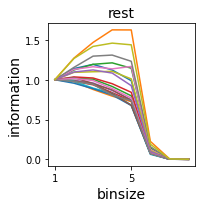

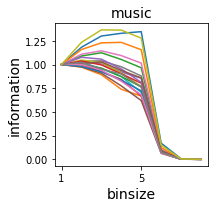

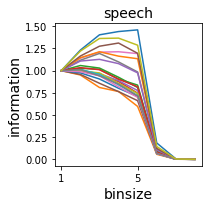

In [46]:
            
fs=14
for sound in sound_list:
    plt.figure(figsize=(3,3))
    plt.title(sound, fontsize=fs)
    for subject in subject_list:
        plt.plot(binsizes, np.array(ex_entropy[subject][sound])/np.array(ex_entropy_seq[subject][sound]))
    plt.ylabel('excess_entropy', fontsize=fs)
    plt.xticks(binsizes[::4], binsizes[::4])
    plt.xlabel('binsize', fontsize=fs)
    plt.tight_layout()
    plt.savefig(path+'figure/excess_entropy_vs_threshold_'+sound+'.png', dpi=600)
    plt.show()
    plt.close()
    

In [9]:
datatipe='hgenv_down100'
data=sv.loading( path+"data_subject_sound_" + datatipe)

zdata=data[subject_list[10]]

thres=np.percentile(zdata['rest'], 95)

avalanches=av.go_avalanches(zdata['speech'].T, thre=thres, direc=0, binsize=1)
                
data_bin=avalanches['Zbin'].T
                
exce=mp.excess_entropy(data_bin,6)







Error!!!
1.109162098668749 0
Error!!!
1.0931001479161182 1
Error!!!
1.1196206386496088 2
Error!!!
1.1054728965457175 3
Error!!!
1.1191507874358284 4
Error!!!
1.1006699730270602 5
Error!!!
1.0954320020882247 6
Error!!!
1.1058905420690794 7
Error!!!
1.1038371182458848 8
Error!!!
1.1412163925867835 9
Error!!!
1.1035760897937779 10
Error!!!
1.1157226137648966 11
Error!!!
1.1093361176368137 12
Error!!!
1.1043417732532799 13
Error!!!
1.132811276429127 14
Error!!!
1.094109457930909 15
Error!!!
1.0936570086139352 16
Error!!!
1.0698686156791113 17
Error!!!
1.0913077525450232 18
Error!!!
1.1116853737057286 19
Error!!!
1.1074741146784948 20
Error!!!
1.1226137649003658 21
Error!!!
1.1302705994953361 22
Error!!!
1.1255024797702904 23
Error!!!
1.100374140781338 24
Error!!!
1.1002349256068875 25
Error!!!
1.0905768728791427 26
Error!!!
1.0908379013312404 27
Error!!!
1.1096841555729489 28
Error!!!
1.1182284869050696 29
Error!!!
1.121273818846246 30
Error!!!
1.0988253719655348 31
Error!!!
1.193857130427

In [55]:
exce


array([ 88.86584639, 179.59210723, 154.8661209 , 188.47976129,
        42.44237381,  87.99868209,  57.79279567,  84.92343328,
       218.38846331, 131.10304142])

In [1]:
import mattepy as mp